In [64]:
# ============================
# 1) GaussianNB from Scratch
# ============================

Accuracy: 0.9250
Confusion Matrix:
[[72  3]
 [ 6 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        75
           1       0.93      0.87      0.90        45

    accuracy                           0.93       120
   macro avg       0.93      0.91      0.92       120
weighted avg       0.93      0.93      0.92       120


Total time : 0.007708 seconds


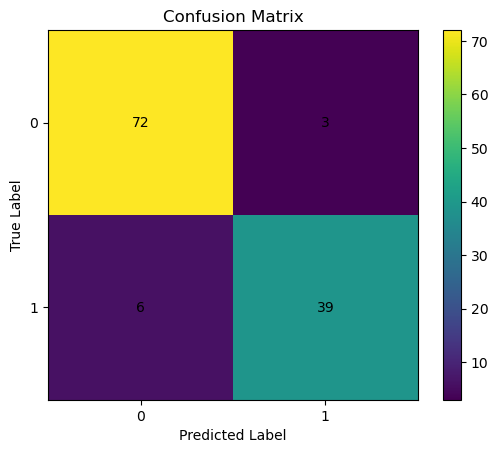

In [73]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

class NaiveBayes:
    def fit(self, X, y):

        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            var_c = np.maximum(X_c.var(axis=0, ddof=0), 1e-9)
            self._var[idx, :] = var_c
            self._priors[idx] = X_c.shape[0] / float(n_samples)


    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior += prior
            posteriors.append(posterior)

        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


if __name__ == "__main__":
    
    def accuracy_score(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
        
    df = pd.read_csv('data.csv')
    
    columns_to_drop = []
    if 'id' in df.columns:
        columns_to_drop.append('id')
    if 'Unnamed: 32' in df.columns:
        columns_to_drop.append('Unnamed: 32')

    df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
    
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

    X = df.drop('diagnosis', axis=1).values
    y = df['diagnosis'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=42, stratify=y)

    start_time = time.time()
    nb = NaiveBayes()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    end_time = time.time()
    totalTime = end_time - start_time

    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(class_report)
    print(f"\nTotal time : {totalTime:.6f} seconds")

    plt.imshow(cm)
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    class_labels = [0, 1]
    plt.xticks(np.arange(len(class_labels)), class_labels)
    plt.yticks(np.arange(len(class_labels)), class_labels)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]),
                     ha="center", va="center")

    plt.show()